In [9]:
import sys
sys.path.append('../')
# print (sys.path)
import torch
import logging
import unittest
import traceback
import numpy as np

from castle.algorithms import *
from castle.common import consts
from castle.common import GraphDAG
from castle.metrics import MetricsDAG

from utils.functional import combined_params

In [10]:
data = np.load('dataset/linear_gauss_6nodes_15edges.npz', allow_pickle=True)
x = data['x']
true_dag = data['y']
rank = np.linalg.matrix_rank(true_dag)
error_params = []

In [7]:
class TestCastleAll(unittest.TestCase):
    """This class for test castle algorithms whether run smoothly. """

    @staticmethod
    def load_data():

        data = np.load('dataset/linear_gauss_6nodes_15edges.npz', allow_pickle=True)

        return data

    def add_params(self, params=None) -> dict:
        """
        add parameter `device_type` for algorithms based on torch

        Parameters
        ----------
        params: dict
            from castle.common.consts
        """

        if params is None:
            params = dict()
        if torch.cuda.is_available():
            params['device_type'] = ['cpu', 'gpu']
        else:
            params['device_type'] = ['cpu']

        return params

    def setUp(self) -> None:
        data = self.load_data()
        self.x = data['x']
        self.true_dag = data['y']
        print(self.true_dag, self.x)
        self.rank = np.linalg.matrix_rank(self.true_dag)
        self.error_params = []
        logging.info("Load dataset complete!")

    def tearDown(self) -> None:
        """print which parameter combinations fail to be executed"""

        logging.info(f"{'=' * 20}Test completed!{'=' * 20}")
        logging.info("Failed to execute the following parameter combinations: ")
        if self.error_params:
            for each in self.error_params:
                logging.info(each)

    def test_ANMNonlinear(self):
        """test ANMNonlinear"""

        logging.info(f"{'=' * 20}Start Testing ANMNonlinear{'=' * 20}")
        try:
            algo = ANMNonlinear()
            algo.learn(data=self.x)
        except Exception:
            logging.error(traceback.format_exc())

    def test_CORL(self):
        logging.info(f"{'=' * 20}Start Testing CORL{'=' * 20}")
        params = self.add_params(consts.CORL_VALID_PARAMS)
        for d in combined_params(params):
            try:
                algo = CORL(**d, iteration=3)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_DirectLiNGAM(self) -> None:
        logging.info(f"{'=' * 20}Start Testing DirectLiNGAM{'=' * 20}")
        for d in combined_params(consts.DIRECT_LINGAM_VALID_PARAMS):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = DirectLiNGAM(**d)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_GES_bic_scatter(self) -> None:
        logging.info(f"{'=' * 20}Start Testing GES_bic_scatter{'=' * 20}")
        d = {'criterion': 'bic', 'method': 'scatter'}
        print(f"\n{'=' * 100}")
        print(d)
        print(f"{'=' * 100}")
        try:
            algo = GES(**d)
            algo.learn(data=self.x)
        except Exception:
            self.error_params.append(d)
            print(traceback.format_exc())

    def test_GES_bic_r2(self) -> None:
        logging.info(f"{'=' * 20}Start Testing GES_bic_r2{'=' * 20}")
        d = {'criterion': 'bic', 'method': 'r2'}
        print(f"\n{'=' * 100}")
        print(d)
        print(f"{'=' * 100}")
        try:
            algo = GES(**d)
            algo.learn(data=self.x)
        except Exception:
            self.error_params.append(d)
            print(traceback.format_exc())

    @unittest.skip(reason='Just for discrete data.')
    def test_GES_bdeu(self) -> None:
        logging.info(f"{'=' * 20}Start Testing GES_bdeu{'=' * 20}")
        d = {'criterion': 'bdeu'}
        print(f"\n{'=' * 100}")
        print(d)
        print(f"{'=' * 100}")
        try:
            algo = GES(**d)
            algo.learn(data=self.x)
        except Exception:
            self.error_params.append(d)
            print(traceback.format_exc())

    def test_GOLEM(self) -> None:
        logging.info(f"{'=' * 20}Start Testing GOLEM{'=' * 20}")
        params = self.add_params()
        for d in combined_params(params):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = GOLEM(**d, num_iter=3)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_GraNDAG(self) -> None:
        logging.info(f"{'=' * 20}Start Testing GraNDAG{'=' * 20}")
        params = self.add_params(consts.GRANDAG_VALID_PARAMS)
        for d in combined_params(params):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = GraNDAG(**d, input_dim=self.x.shape[1], iterations=3)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_DAG_GNN(self) -> None:
        logging.info(f"{'=' * 20}Start Testing DAG_GNN{'=' * 20}")
        params = self.add_params(consts.GNN_VALID_PARAMS)
        for d in combined_params(params):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = DAG_GNN(**d, epochs=5, k_max_iter=5)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_ICALiNGAM(self) -> None:
        logging.info(f"{'=' * 20}Start Testing ICALiNGAM{'=' * 20}")
        try:
            # Instantiation algorithm
            algo = ICALiNGAM()
            algo.learn(data=self.x)
        except Exception:
            print(traceback.format_exc())

    def test_Notears(self) -> None:
        logging.info(f"{'=' * 20}Start Testing Notears{'=' * 20}")
        for d in combined_params(consts.NOTEARS_VALID_PARAMS):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = Notears(**d, max_iter=3)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_MCSL(self) -> None:
        logging.info(f"{'=' * 20}Start Testing MCSL{'=' * 20}")
        params = self.add_params(consts.MCSL_VALID_PARAMS)
        for d in combined_params(params):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = MCSL(**d, max_iter=3, iter_step=3)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_NotearsNonlinear(self) -> None:
        logging.info(f"{'=' * 20}Start Testing NotearsNonlinear{'=' * 20}")
        params = self.add_params(consts.NONLINEAR_NOTEARS_VALID_PARAMS)
        for d in combined_params(params):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = NotearsNonlinear(**d, max_iter=3, rho_max=1e4)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_NotearsLowRank(self) -> None:
        logging.info(f"{'=' * 20}Start Testing NotearsLowRank{'=' * 20}")
        try:
            algo = NotearsLowRank(max_iter=3)
            algo.learn(data=self.x, rank=self.rank)
        except Exception:
            print(traceback.format_exc())

    def test_PC(self) -> None:
        logging.info(f"{'=' * 20}Start Testing PC{'=' * 20}")
        for d in combined_params(consts.PC_VALID_PARAMS):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = PC(**d)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

    def test_RL(self) -> None:
        logging.info(f"{'=' * 20}Start Testing RL{'=' * 20}")
        params = self.add_params(consts.RL_VALID_PARAMS)
        for d in combined_params(params):
            print(f"\n{'=' * 100}")
            print(d)
            print(f"{'=' * 100}")
            try:
                algo = RL(**d, nb_epoch=3)
                algo.learn(data=self.x)
            except Exception:
                self.error_params.append(d)
                print(traceback.format_exc())

In [8]:
runner = unittest.TextTestRunner()
runner.run(TestCastleAll('test_ANMNonlinear'))

2023-03-16 13:55:13,352 - /var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_30018/2190528857.py[line:37] - INFO: Load dataset complete!
2023-03-16 13:55:13,353 - /var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_30018/2190528857.py[line:51] - INFO: ====================Start Testing ANMNonlinear====================


[[0 0 1 0 1 0]
 [1 0 1 1 1 1]
 [0 0 0 0 1 0]
 [0 0 1 0 1 0]
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]] [[  0.867   1.924  -6.816  -2.305  -7.145   2.09 ]
 [  0.698   0.991  -3.66   -0.943  -6.728   0.86 ]
 [ -0.512   0.381   0.982   0.409   3.64    0.787]
 ...
 [  3.665   0.944  -2.667   0.546 -12.22   -1.127]
 [ -0.626   0.606   0.419  -1.02    3.479   1.406]
 [ -1.361   0.135  -1.56   -1.479   0.074   1.162]]


2023-03-16 13:56:24,788 - /var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_30018/2190528857.py[line:42] - INFO: ====================Test completed!====================
2023-03-16 13:56:24,789 - /var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_30018/2190528857.py[line:43] - INFO: Failed to execute the following parameter combinations: 
.
----------------------------------------------------------------------
Ran 1 test in 71.442s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [11]:
anm = ANMNonlinear()

In [12]:
# plot predict_dag and true_dag
GraphDAG(ANMNonlinear.causal_matrix, true_dag, 'result')

# calculate metrics
mt = MetricsDAG(ANMNonlinear.causal_matrix, true_dag)
print(mt.metrics)

TypeError: Input est_dag is not numpy.ndarray!

2023-03-16 13:52:22,653 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


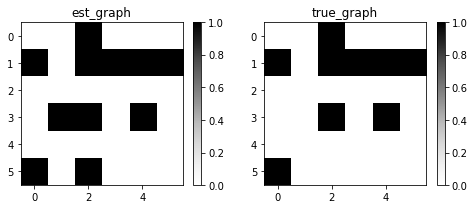

{'fdr': 0.1, 'tpr': 1.0, 'fpr': 0.1667, 'shd': 1, 'nnz': 10, 'precision': 0.8182, 'recall': 1.0, 'F1': 0.9, 'gscore': 0.7778}


In [2]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import DAG, IIDSimulation
from castle.algorithms import ANMNonlinear


weighted_random_dag = DAG.erdos_renyi(n_nodes=6, n_edges=10, weight_range=(0.5, 2.0), seed=1)

anm = ANMNonlinear(alpha=0.05)
anm.learn(data=X)

# plot predict_dag and true_dag
GraphDAG(anm.causal_matrix, true_dag)
mm = MetricsDAG(anm.causal_matrix, true_dag)
print(mm.metrics)